# Introducción a la Míneria de Datos

## Modelado Predictivo
### Ejercicio 1.1

#### Prediciendo el Tipo de una Flor

Considera la tarea de predecir una especie de flor basada en las características de la flor. En particular, considera clasificar una flor Iris según si pertenece a una de las siguientes tres especies de Iris: Setosa, Versicolour o Virginica. Para realizar esta tarea, necesitamos un conjunto de datos que contenga las características de varias flores de estas tres especies. Un conjunto de datos con este tipo de información es el conocido conjunto de datos [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) del Repositorio de Aprendizaje Automático de UCI . Además de la especie de una flor, este conjunto de datos contiene cuatro otros atributos: ancho del sépalo, largo del sépalo, largo del pétalo y ancho del pétalo.

<div>
    <div style="float:left;margin-right:15px;">
        <a href="https://en.wikipedia.org/wiki/File:Kosaciec_szczecinkowaty_Iris_setosa.jpg">
            <img src="welcome-data/assets/Iris_setosa.jpg" alt="Iris setosa" height="185" width="185"/>
        </a>
        <p style="text-align:center;font-size:0.85rem;">Iris setosa</p>
    </div>
    <div style="float:left;margin-right:15px;">
        <a href="https://en.wikipedia.org/wiki/Iris_versicolor#/media/File:Blue_Flag,_Ottawa.jpg">
            <img src="welcome-data/assets/Iris_versicolor.jpg" alt="Iris versicolor" height="185" width="185"/>
        </a>
        <p style="text-align:center;font-size:0.85rem;">Iris versicolor</p>
    </div>
    <div style="float:left;">
        <a href="https://en.wikipedia.org/wiki/Iris_virginica#/media/File:Iris_virginica_2.jpg">
            <img src="welcome-data/assets/Iris_virginica.jpg" alt="Iris virginica" height="185" width="185"/>
        </a>
        <p style="text-align:center;font-size:0.85rem;">Iris virginica</p>
    </div>
</div>

In [2]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Id                 150 non-null    int64  
 1   Sepal length (cm)  150 non-null    float64
 2   Sepal width (cm)   150 non-null    float64
 3   Petal length (cm)  150 non-null    float64
 4   Petal width (cm)   150 non-null    float64
 5   Species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Parece que el conjunto de datos consta de 150 muestras y tiene 6 columnas: 
- identificador de muestra
- 4 características medidas
- Etiqueta de muestra, es decir, la especie de Iris a la que pertenece esta muestra.

In [3]:
# Useful Arrays for later use
# All unique Iris species from the data set
species = pd.unique(df['Species'].sort_values())
# Colors for identifying species on plots
colors = ['darkslateblue', 'turquoise', 'darkorange']
# List of measured features in the data set
features = ['Sepal length (cm)', 'Sepal width (cm)', 'Petal length (cm)', 'Petal width (cm)']
# Number of samples for each species
counts = df['Species'].value_counts().sort_index()

##### Análisis

Revisemos como se distribuye la muestra de datos a traves de las clases usando una grafica de barras que muestre el numero de muestras por cada especie de Iris en el dataset 

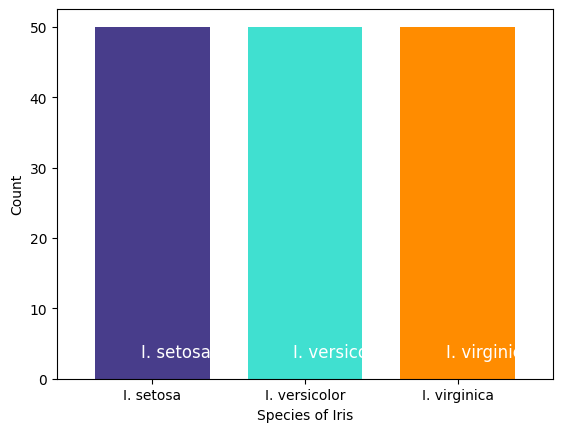

In [4]:
import matplotlib.pyplot as plt

# Display counts as bar plot
ax = counts.plot.bar(width=0.75, color=colors)
# Add counts as text over bars
for i, v in counts.reset_index().iterrows():
    ax.text(i - 0.075, 3.0,v.Species, color='white', size='large')
# Rotate X axis ticks
plt.xticks(rotation='horizontal')
# Add labels
plt.xlabel('Species of Iris')
plt.ylabel('Count')
plt.show()

Parece que el conjunto de datos está bien equilibrado, lo que significa que tenemos el mismo número de muestras para cada clase con la que entrenaremos nuestro modelo para predecir. Si no lo estuviera (por ejemplo, si una de las especies de iris tuviera significativamente más muestras en el conjunto de datos que las demás), tendríamos que hacer un trabajo adicional durante la etapa de preprocesamiento para asegurarnos de que cada clase esté igualmente representada: un clasificador entrenado con datos desequilibrados puede tener un sesgo, favoreciendo la clase con la mayor proporción de muestras, lo que puede llevar a precisiones engañosas.

Intentemos investigar si las características informadas en el conjunto de datos serán útiles para separar las muestras en clases. Comenzaremos con una combinación de gráficos de dispersión de proyección 2D: hay 4 características en el conjunto de datos, lo que se traduce en 6 pares únicos de características que se usarán para los ejes de la trama 2D. Puedes pensar en cada gráfico como una proyección 2D del espacio de características "completo" 4D, que solo toma en cuenta 2 de las 4 características disponibles.

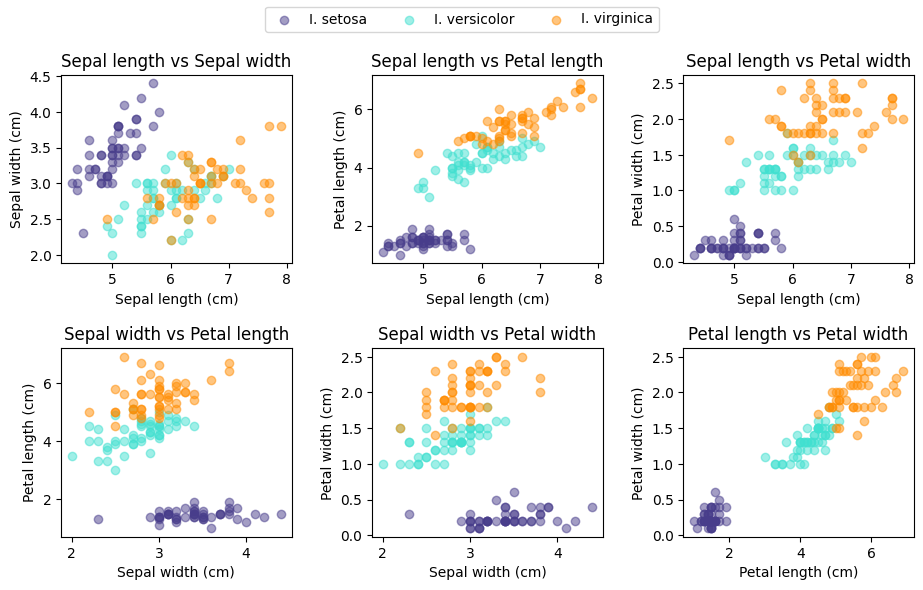

In [5]:
import numpy as np
import itertools

# Construct a list of 6 possible pairs of features
feature_2s = np.array(list(itertools.combinations(features, 2)))
# Plot each 2D projection
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(11, 6))
plt.subplots_adjust(hspace=0.45, wspace=0.35)
for ax, feature1, feature2 in zip(axs.reshape(-1), feature_2s[:, 0], feature_2s[:, 1]):
    for name, color in zip(species, colors):    
        df_spec = df[df['Species'] == name]    
        ax.scatter(df_spec[feature1], df_spec[feature2], color=color, alpha=0.5, label=name)
    ax.set_xlabel(feature1)
    ax.set_ylabel(feature2)
    ax.set_title((feature1 + ' vs ' + feature2).replace(' (cm)',''))
# Add legend
handles, labels = axs[1, 2].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3)
plt.show()

Se muestra una gráfica del ancho del pétalo versus el largo del pétalo para las 150 flores en el conjunto de datos Iris. El ancho del pétalo se divide en las categorías bajo, medio y alto, que corresponden a los intervalos [0, 0.75), [0.75, 1.75), [1.75, ∞), respectivamente. Además, el largo del pétalo se divide en categorías bajo, medio y alto, que corresponden a los intervalos [0, 2.5), [2.5, 5), [5, ∞), respectivamente. Basado en estas categorías de ancho y largo del pétalo, se pueden derivar las siguientes reglas:

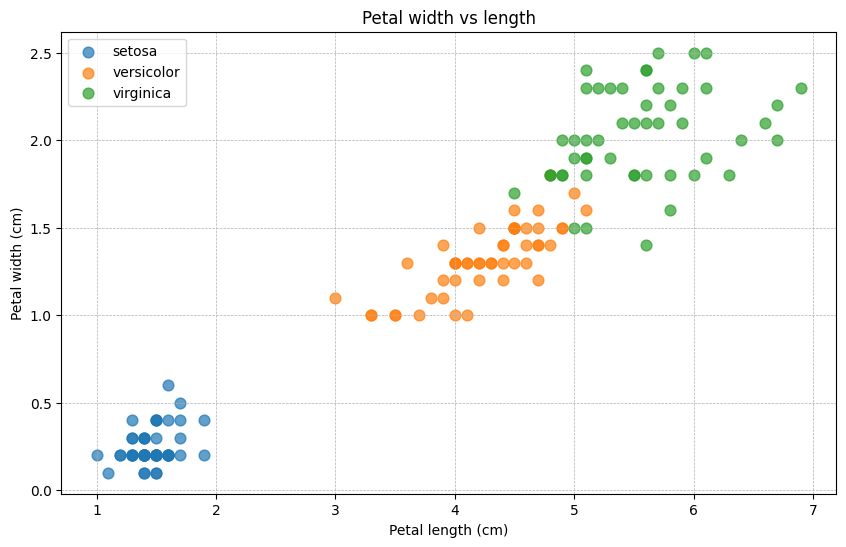

In [8]:
from sklearn.datasets import load_iris
# Cargar el conjunto de datos de Iris
data= load_iris()
x = data.data
y= data.target
labels= data.target_names

# Definir las categorias para el ancho y largo del pétalo
def categorize_petal_width(petal_width):
    if petal_width < 0.75:
        return 'low'
    elif petal_width < 1.75:
        return 'medium'
    else:
        return 'high'

def categorize_petal_length(petal_length):
    if petal_length < 2.5:
        return 'low'
    elif petal_length < 5.0:
        return 'medium'
    else:
        return 'high'

petal_width_categories= np.array ([categorize_petal_width(w) for w in x[:,3]])
petal_length_categories= np.array ([categorize_petal_length(l) for l in x[:,2]])

# Gráfico de dispersión
fig, ax= plt.subplots(figsize=(10,6))

# Colorear puntos basados en las reglas mencionadas
for idx, label in enumerate(labels):
   mask= (y==idx)
   ax.scatter(x[mask,2], x[mask,3], label= label, s=60, alpha=0.7)

# Agregar leyendas y titulos
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
ax.set_title('Petal width vs length')
ax.legend()

# Mostrar el gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Aqui se muestra un gráfico de dispersión que muestra el ancho del pétalo versus el largo del pétalo para las flores del conjunto de datos Iris. Los puntos estan coloreados segun especie.

Ahora vamos a dividir el gráfico en las categorias "bajo", "medio" y "alto" para el ancho y largo del pétalo, y resaltar las regiones que corresponden a las reglas mencionadas.

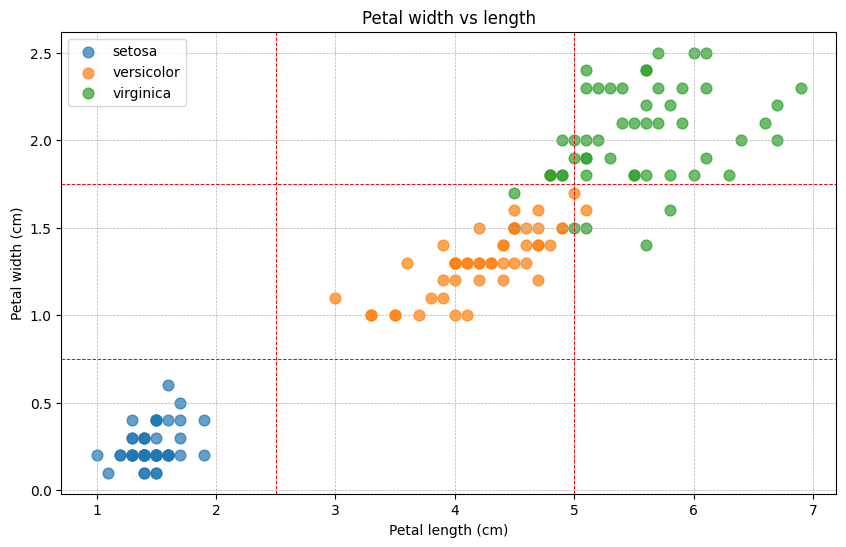

In [9]:
# Definir las lineas divisorias para las categorias en el grafico
lines= {
    "petal_width": [0.75, 1.75],
    "petal_length": [2.5, 5.0]
}

# Grafico con las catregorias
fig, ax= plt.subplots(figsize=(10,6))

# Dibujar lineas divisiorias
ax.axhline(lines["petal_width"][0], c='r', linestyle='--', linewidth=0.7)
ax.axhline(lines["petal_width"][1], c='r', linestyle='--', linewidth=0.7)
ax.axvline(lines["petal_length"][0], c='r', linestyle='--', linewidth=0.7)
ax.axvline(lines["petal_length"][1], c='r', linestyle='--', linewidth=0.7)

# Colorear puntos basados en las reglas mencionadas
for idx, label in enumerate(labels):
   mask= (y==idx)
   ax.scatter(x[mask,2], x[mask,3], label= label, s=60, alpha=0.7)

# Agregar leyendas y titulos
ax.set_xlabel('Petal length (cm)')
ax.set_ylabel('Petal width (cm)')
ax.set_title('Petal width vs length')
ax.legend()

# Mostrar el gráfico
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


- La región inferior izquierda (Ancho del pétalo bajo y Largo de pétalo bajo) contiene principalmnente flores Setosa.
- La región central (Ancho de pétalo medio y Largo de pétalo medio) contiene principalmente flores Versicolor.
- la región superior derecha (Ancho de pétalo alto y Largo de petalo alto) contiene principalmene flores Virginica.

## Análisis de Asociación
### Ejercicio 1.2

**Análisis de Cesta de Compra**

Supongamos que tienes un conjunto de datos de transacciones de un supermercado, donde cada transacción es una lista de productos comprados:

In [2]:
transacciones = [
    ['Leche', 'Pañales', 'Cerveza'],
    ['Leche', 'Pañales'],
    ['Cerveza', 'Pañales'],
    ['Leche', 'Pan'],
    ['Pan']
]
print(transacciones)

[['Leche', 'Pañales', 'Cerveza'], ['Leche', 'Pañales'], ['Cerveza', 'Pañales'], ['Leche', 'Pan'], ['Pan']]


Para llevar a cabo el análisis de asociación, primero debes convertir estas transacciones en un DataFrame con codificación One-Hot:

In [3]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transacciones).transform(transacciones)
df = pd.DataFrame(te_ary, columns=te.columns_)

El DataFrame resultante tendrá columnas como "Cerveza", "Leche", "Pañales", "Pan" y cada fila representará una transacción con valores True o False según si el producto estuvo presente en la transacción o no.

Ahora, utilizando el método `apriori` de `mlxtend`, puedes encontrar conjuntos de elementos frecuentes:

In [4]:
from mlxtend.frequent_patterns import apriori

conjuntos_frecuentes = apriori(df, min_support=0.2, use_colnames=True)
print(conjuntos_frecuentes)


   support                   itemsets
0      0.4                  (Cerveza)
1      0.6                    (Leche)
2      0.4                      (Pan)
3      0.6                  (Pañales)
4      0.2           (Cerveza, Leche)
5      0.4         (Cerveza, Pañales)
6      0.2               (Leche, Pan)
7      0.4           (Leche, Pañales)
8      0.2  (Cerveza, Leche, Pañales)


Finalmente, puedes generar reglas de asociación con el método association_rules:

In [5]:
from mlxtend.frequent_patterns import association_rules

reglas = association_rules(conjuntos_frecuentes, metric="lift", min_threshold=0.5)
print(reglas[["antecedents", "consequents", "lift"]])


           antecedents         consequents      lift
0            (Cerveza)             (Leche)  0.833333
1              (Leche)           (Cerveza)  0.833333
2            (Cerveza)           (Pañales)  1.666667
3            (Pañales)           (Cerveza)  1.666667
4              (Leche)               (Pan)  0.833333
5                (Pan)             (Leche)  0.833333
6              (Leche)           (Pañales)  1.111111
7            (Pañales)             (Leche)  1.111111
8     (Cerveza, Leche)           (Pañales)  1.666667
9   (Cerveza, Pañales)             (Leche)  0.833333
10    (Leche, Pañales)           (Cerveza)  1.250000
11           (Cerveza)    (Leche, Pañales)  1.250000
12             (Leche)  (Cerveza, Pañales)  0.833333
13           (Pañales)    (Cerveza, Leche)  1.666667


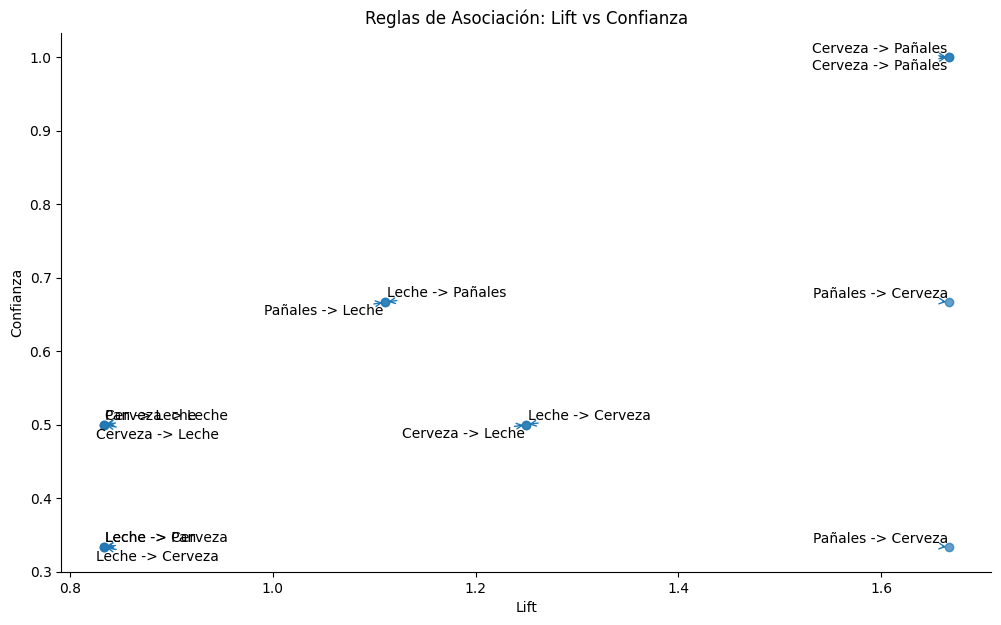

In [6]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

plt.figure(figsize=(12, 7))

# Usar un color neutro para los puntos y un fondo claro
plt.scatter(reglas['lift'], reglas['confidence'], alpha=0.7, color='#1f77b4') 
plt.xlabel('Lift')
plt.ylabel('Confianza')
plt.title('Reglas de Asociación: Lift vs Confianza')

# Usar colores oscuros para las etiquetas para mejorar la legibilidad
texts = []
for i, row in reglas.iterrows():
    texts.append(plt.text(row['lift'], row['confidence'], f"{list(row['antecedents'])[0]} -> {list(row['consequents'])[0]}", color='black'))

# Ajustar las etiquetas para reducir el solapamiento
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='#1f77b4'))

# Minimizar "chartjunk" al simplificar los ejes
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()


**Aspectos clave del gráfico**:

1. **Ejes**:
   - **Eje X (Lift)**: Esta métrica indica la fuerza de una regla. Un valor de lift mayor que 1 sugiere que la aparición de los antecedentes (por ejemplo, `Leche`) aumenta la probabilidad de que aparezcan los consecuentes (por ejemplo, `Pañales`) en una transacción.
   - **Eje Y (Confianza)**: Esta métrica indica la fiabilidad de la regla. Una alta confianza para la regla `{Leche} → {Pañales}` significa que, en muchas transacciones que contienen `Leche`, también se encuentra `Pañales`.

2. **Puntos**:
   Cada punto en el gráfico representa una regla de asociación específica derivada del conjunto de datos. Su posición en el gráfico se determina en función de las métricas de lift y confianza de esa regla específica.

3. **Etiquetas**:
   Estas señalan directamente a los puntos y nos indican qué regla de asociación representa ese punto. Por ejemplo, una etiqueta que dice "Leche -> Pañales" nos informa sobre la regla de asociación entre esos dos ítems.

**Interpretación del gráfico**:

- **Puntos más cercanos al eje Y (alto en confianza)**: Estas reglas tienen una alta probabilidad de ocurrencia. Es decir, cuando se cumple la condición del antecedente (el ítem o ítems antes de la flecha), es muy probable que también se cumpla el consecuente (el ítem o ítems después de la flecha).

- **Puntos más alejados hacia la derecha (alto en lift)**: Estas reglas indican una fuerte asociación entre el antecedente y el consecuente. Si el lift es exactamente 1, significa que los ítems son completamente independientes. Si es mayor que 1, sugiere que hay una relación positiva.

- **Puntos en la esquina superior derecha**: Representan reglas de asociación que son tanto fiables (alta confianza) como fuertes (alto lift). Estas son generalmente las reglas más valiosas, ya que nos dicen que no solo son comunes, sino que también hay una relación fuerte entre los ítems.

## Análisis de Agrupados
### Ejercicio 1.3

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


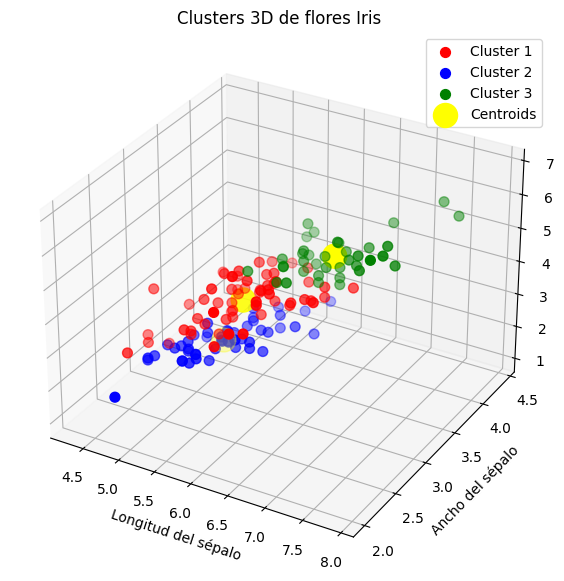

In [8]:
# Importando las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Cargando el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data

# Usando KMeans para agrupar las observaciones en 3 clusters
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Visualizando los clusters en 3D (longitud, ancho y altura de los sépalos y pétalos)
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2], s=50, c='red', label='Cluster 1')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2], s=50, c='blue', label='Cluster 2')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2], s=50, c='green', label='Cluster 3')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='yellow', label='Centroids')
ax.set_title('Clusters 3D de flores Iris')
ax.set_xlabel('Longitud del sépalo')
ax.set_ylabel('Ancho del sépalo')
ax.set_zlabel('Longitud del pétalo')
ax.legend()

plt.show()


El algoritmo KMeans es un método de agrupamiento que busca particionar un conjunto de n observaciones en k clusters, en el que cada observación pertenece al cluster con la media más cercana. La "media" se refiere al centroide del cluster, que es la media aritmética de los puntos dentro del cluster.

El gráfico en 3D que generamos muestra tres de las características del conjunto de datos Iris: la longitud del sépalo, el ancho del sépalo y la longitud del pétalo. Los puntos en el espacio tridimensional representan las flores, y están coloreados según el cluster al que fueron asignados por el algoritmo KMeans.

Los centroides (mostrados en amarillo) representan el "centro" de cada cluster. Idealmente, estos centroides se ubicarán de tal manera que la distancia entre un punto en un cluster y el centroide de ese cluster sea mínima.

Es importante tener en cuenta que, aunque estamos visualizando tres características en el gráfico 3D, el algoritmo KMeans en este ejemplo en realidad usó todas las ca]racterísticas disponibles (4 en total) para determinar los clusters. Sin embargo, solo podemos visualizar tres a la vez en un gráfico 3D.


/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


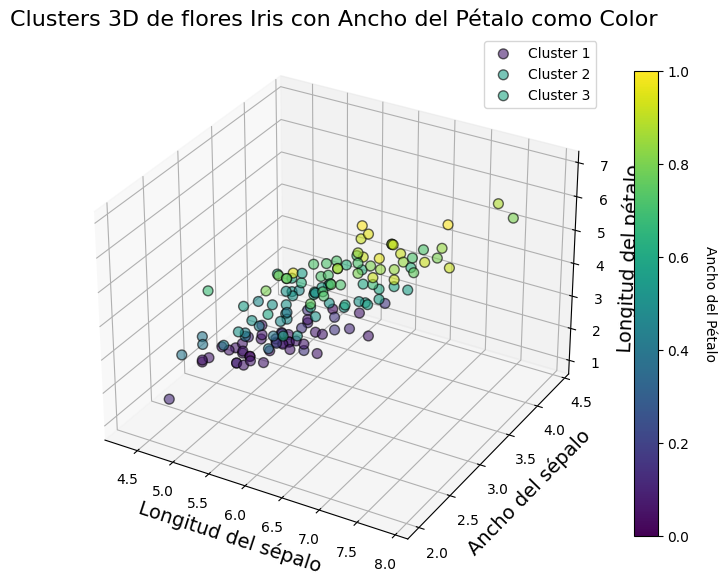

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Cargando el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data

# Usando KMeans para agrupar las observaciones
kmeans = KMeans(n_clusters=3)
y_kmeans = kmeans.fit_predict(X)

# Visualizando los clusters en 3D usando color para la cuarta dimensión
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(X[:, 3] / np.max(X[:, 3]))  # Usando el ancho del pétalo para determinar el color

for i, color in enumerate(['#1f77b4', '#ff7f0e', '#2ca02c']):
    ax.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], X[y_kmeans == i, 2], s=50, c=colors[y_kmeans == i], edgecolors='k', label=f'Cluster {i+1}', alpha=0.6)

ax.set_title('Clusters 3D de flores Iris con Ancho del Pétalo como Color', fontsize=16)
ax.set_xlabel('Longitud del sépalo', fontsize=14)
ax.set_ylabel('Ancho del sépalo', fontsize=14)
ax.set_zlabel('Longitud del pétalo', fontsize=14)
ax.legend()

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.set_label('Ancho del Pétalo', rotation=270, labelpad=20)

plt.show()
